In [1]:
import pandas as pd
import numpy as np

In [ ]:
# Uncomment this if you are using Google Colab
#!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/BiasVarianceDemo/data.csv
#!wget https://raw.githubusercontent.com/PrzemekSekula/DeepLearningClasses1/master/BiasVarianceDemo/helper.py

### Data loading

In [2]:
df = pd.read_csv('./data.csv')
print(df.shape)
df.head()

(500, 4)


,area,crime_rate,metro_proximity,price
0,127,4.353254,3609.371479,236
1,117,1.679765,2221.716693,230
2,39,8.455495,1565.989757,94
3,131,2.014797,3405.380227,232
4,96,3.707401,1227.551028,219


### DATA Split
Let's define features and labels first

In [3]:
X = df.drop('price', axis=1)
X.head()

,area,crime_rate,metro_proximity
0,127,4.353254,3609.371479
1,117,1.679765,2221.716693
2,39,8.455495,1565.989757
3,131,2.014797,3405.380227
4,96,3.707401,1227.551028


In [4]:
y = df['price']
y.head()

0    236
1    230
2     94
3    232
4    219
Name: price, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (350, 3)
y train shape: (350,)
X test shape: (150, 3)
y test shape: (150,)


### Model creation, training and testing
We will use $MAPE$ to test the model.

$$MAPE = 100\% * \frac{1}{n} \sum_{i=1}^n\displaystyle\left\lvert \frac{ypred_i-y_i}{y_i}\right\rvert$$

Where:
- $y$ - real price
- $ypred$ - estimated price (model's output)
- $n$ - number of examples

In [8]:
def get_mape(model, X, y):
    pred = model.predict(X)
    return np.mean(100 * np.abs((y-pred) / y))

Let's use random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(min_samples_leaf=20)
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=20)

In [49]:
train_mape = get_mape(model, X_train, y_train)
print(f'Train MAPE: {train_mape:.3f}%')

train_mape = get_mape(model, X_test, y_test)
print(f'Test MAPE: {train_mape:.3f}%')

Train MAPE: 6.978%
Test MAPE: 8.998%


### Question: Overfitting, Underfitting or OK?

### Improving a model

In [50]:
mapes_train = []
mapes_test = []

for i in range(1, 40):
    model = RandomForestRegressor(min_samples_leaf=20)
    model.fit(X_train, y_train)

    train_mape = get_mape(model, X_train, y_train)
    mapes_train.append(train_mape)
    test_mape = get_mape(model, X_test, y_test)
    mapes_test.append(test_mape)

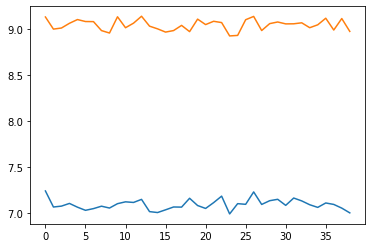

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
f = plt.figure()
plt.plot(mapes_train)
plt.plot(mapes_test)